In [26]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [28]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }


# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]


# Prediction Visualizations (enrich vs burnup)

## Low burnup data set

In [17]:
trainXY = pd.read_pickle("../lowburnup_pickles/trainXY_2nov.pkl")
trainXY.head()

case,index,10001002,10001003,10002003,10002004,10002005,10002006,10003006,10003007,10003008,...,31067166,31067170,31068167,31070169,31071169,31071171,31071172,ReactorType,Enrichment,Burnup
0,1.1,0,0,0,0,0,0,0,0,0,...,1.25613e-10,3.27612e-14,3.15173e-14,5.60183e-24,1.33435e-39,6.17744e-26,4.79372e-24,pwr,2.8,600
1,1.2,0,0,0,0,0,0,0,0,0,...,1.25613e-10,1.24619e-14,3.08754e-14,2.26951e-24,1.02911e-39,3.65039e-26,3.97528e-24,pwr,2.8,600
2,1.3,0,0,0,0,0,0,0,0,0,...,1.25612e-10,0,1.55326e-30,0,0,0,0,pwr,2.8,600
3,1.4,0,0,0,0,0,0,0,0,0,...,1.25607e-10,0,0,0,0,0,0,pwr,2.8,600
4,1.5,0,0,0,0,0,0,0,0,0,...,1.25541e-10,0,0,0,0,0,0,pwr,2.8,600


In [18]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']//1000

In [19]:
x = len(trainXY.columns)-3

0    0
1    0
2    0
3    0
4    0
Name: Burnup [GWd/MTU], dtype: int64

In [20]:
dfX = trainXY.iloc[:, 0:x]
dfY_r = trainXY.iloc[:, x]
dfY_e = trainXY.iloc[:, x+1]
dfY_b = trainXY.iloc[:, x+2]

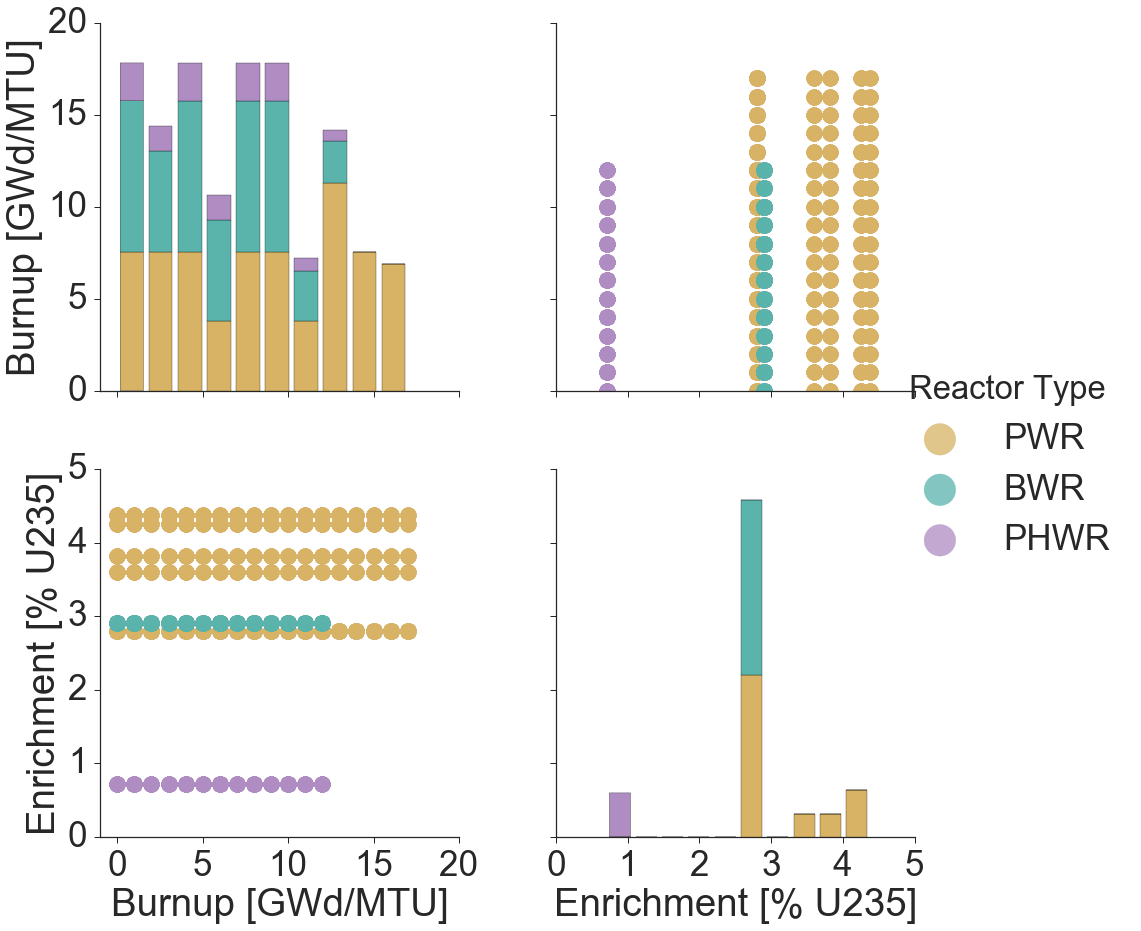

In [32]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=250, alpha=0.75)
g.axes[0,0].set_ylim(0, 20)
g.axes[1,0].set_xlim(-1, 20)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('1train_set.png', bbox_inches='tight', transparent=True)